# Quick Demo

This notebook is a brief domonstration of the usage of CircuitQ for the Transmon as an exemplary circuit.

Please refer to the Tutorial section for more details.

In [1]:
import circuitq as cq

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Exemplary Circuit: Transmon

#### Create circuit

<img src="circuit_figures/transmon_circuit.png" alt="Transmon Circuit" width="200"/>


In [2]:
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')

circuit = cq.CircuitQ(graph)

#### Symbolic Hamiltonian

In [3]:
circuit.h

-E_{J010}*cos(3.03853489761902e+15*\Phi_{1}) + 0.5*q_{1}**2/C_{01}

#### Parameters

In [4]:
circuit.h_parameters

[C_{01}, E_{J010}]

#### Numerical Hamiltonian

In [5]:
h_num = circuit.get_numerical_hamiltonian(401, grid_length=np.pi*circuit.phi_0)

#### Diagonalization

In [6]:
eigv, eigs = circuit.get_eigensystem()

#### Plot Spectrum

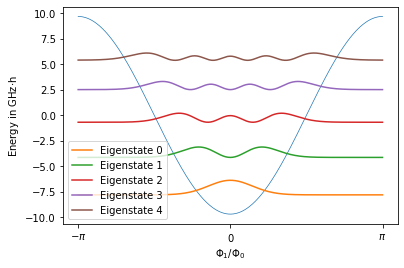

In [7]:
circuit.transform_charge_to_flux()
eigs = circuit.estates_in_phi_basis
n_states = 5
state_scaling = 15 * (eigv[n_states-1]-eigv[0]/n_states)
h = 6.62607015e-34 
y_scaling = 1/(h *1e9)

def potential(phi):
    return -circuit.c_v["E"]*np.cos(phi/circuit.phi_0)
plt.plot(circuit.flux_list, potential(circuit.flux_list)*y_scaling, lw=0.7)
for n in range(n_states):
    plt.plot(circuit.flux_list, 
             (eigv[n] + np.real(eigs[n]*np.conjugate(eigs[n]))*state_scaling)*y_scaling,
             label="Eigenstate " +str(n))
plt.legend()
plt.xticks(np.linspace(-1*np.pi, 1*np.pi, 3)*circuit.phi_0 ,
           [r'$-\pi$',r'$0$',r'$\pi$'])
plt.xlabel(r"$\Phi_1/ \Phi_0$")
plt.ylabel(r"Energy in GHz$\cdot$h")
plt.show()

#### $T1$ Times

In [8]:
T1_qp = circuit.get_T1_quasiparticles()
print("Quasiparticles noise contribution T1 = {:e} s".format(T1_qp))

Quasiparticles noise contribution T1 = 2.636543e-04 s


In [9]:
T1_c = circuit.get_T1_charge()
print("Charge noise contribution T1 = {:e} s".format(T1_c))

Charge noise contribution T1 = 1.308310e-04 s


In [10]:
print("Total T1 = {:e} s".format( 1/( 1/T1_qp + 1/T1_c)))

Total T1 = 8.744092e-05 s
